# Set up

In [1]:
from google.colab import drive

drive.mount('/content/drive')
drive_path = 'drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
!pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout

# List of devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Dataset

Original dataset link: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

In [5]:
df = pd.read_csv(f'{drive_path}/Russia_Real_Estate.csv')
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


## Dataset lookup

In [6]:
df.columns

Index(['price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

In [7]:
df.region.unique()

array([ 2661,    81,  2871,  2843,     3,  3106,  2922,  2900,  2722,
        6171,  3230,  4417,  5282,  5368,  3446,  5520,  6817,  9579,
        2604,  1010,  9648,  7793, 13919,  2860,  3019,  4982,  5241,
        3870,  3991,  2359,  9654,  2072,  8090,  4007, 11171, 10160,
        7873,  2594,  8509, 11416, 11991,  2880,  5178, 13913,  6309,
        5952,  6543,  2328,  5993,  2484, 13098,  4240,  5789,  1901,
       14880, 10201,  1491,  2885,  5794,  2528,  4374,  4695,  5143,
        6937,  2806, 14368,  5736,  7121,  4086,   821, 10582,  7896,
        8640,  5703,  8894,  4249,  3153,  4189,  2814,  7929, 16705,
          69,  4963, 61888])

In [8]:
df.building_type.unique()

array([1, 3, 4, 2, 5, 0])

In [10]:
df.level.unique()

array([ 8,  5, 12, 13,  4,  1,  2,  9, 10, 25,  7,  6, 16, 17, 14, 11,  3,
       18, 15, 23, 21, 20, 22, 19, 28, 24, 26, 32, 30, 27, 31, 29, 34, 33,
       35, 37, 36, 39, 38])

In [9]:
df.levels.unique()

array([10, 24,  9, 16, 14,  5, 25, 15, 17,  8,  2,  3, 18,  4, 22, 12, 20,
        7, 19,  6, 23, 27,  1, 21, 11, 28, 13, 36, 26, 33, 34, 30, 29, 35,
       32, 31, 37, 38, 39])

In [11]:
df.rooms.unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10])

In [13]:
df.object_type.unique()

array([ 1, 11])

In [25]:
df[df.price <= 0]

,price,date,time,geo_lat,geo_lon,...,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,...,22,1,38.92,17.26,11
43822,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,...,22,1,38.92,17.26,11
179212,0,2018-10-01,08:59:36,53.327778,83.668570,...,10,3,104.00,15.00,1
199895,-429242296,2018-10-04,09:21:35,55.038734,82.985600,...,25,2,57.27,9.31,11
208483,-1744967296,2018-10-06,05:06:46,54.991330,82.882575,...,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...,...
5382188,-2041757296,2021-04-23,07:00:09,57.636265,39.973962,...,4,1,41.08,9.31,11
5382595,-1794967296,2021-04-23,07:37:00,56.115619,38.416266,...,5,2,56.00,9.00,1
5398253,-1494967296,2021-04-26,05:04:58,45.111303,36.881901,...,3,1,45.00,17.00,11
5419426,-2094967296,2021-04-27,09:05:31,58.223183,68.305352,...,19,1,30.00,8.00,1


In [8]:
def dataset_lookup(df):
    print('Dataset info:')
    print(df.info())
    print()
    print('Dataset description:')
    print(df.describe())
    print()
    print('Amount of duplicates:')
    duplicates_amount = df.duplicated().sum()
    print(duplicates_amount)
    if (duplicates_amount > 0):
        print('Duplicates:')
        print(df[df.duplicated()])
    print()
    print('Amount of missing values:')
    print(df.isna().sum(axis = 0))
    print()
    print('Unique values in each column:')
    object_types_count = 0
    for column in df:
        if df[column].dtypes == 'object':
            object_types_count += 1
            print('-' * len(column))
            print(f'{column}: {df[column].unique()}')
    if object_types_count == 0:
        print('-' * 10)
        print('No object columns in this dataset.')

dataset_lookup(df)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB
None

Dataset description:
              price       geo_lat       geo_lon        region  building_type  \
count  5.477006e+06  5.477006e+06  5.477006e+06  5.477006e+06   5.477006e+06   
mean   4.422029e+06  5.403826e+01  5.324433e+01  4.307141e+03   1.948966e+00   
std    2.150752e+07  4.622758e+00  2.074763e+01  3.308050e+03   1.038537e+00   
min   -2.144967e+09  4.145906e+01  1.98902

## Dataset showcase

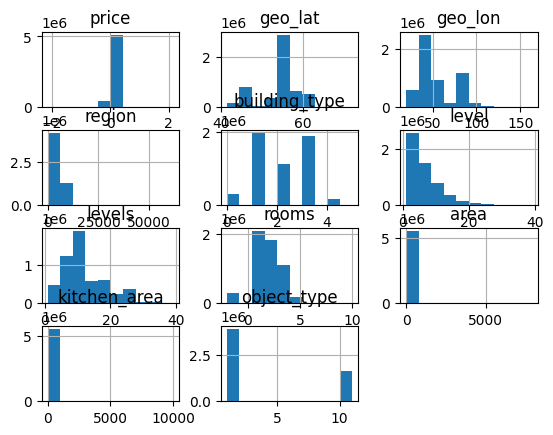

In [9]:
def plot_dataset_histograms(df):
    df.hist()
    plt.show()

plot_dataset_histograms(df)

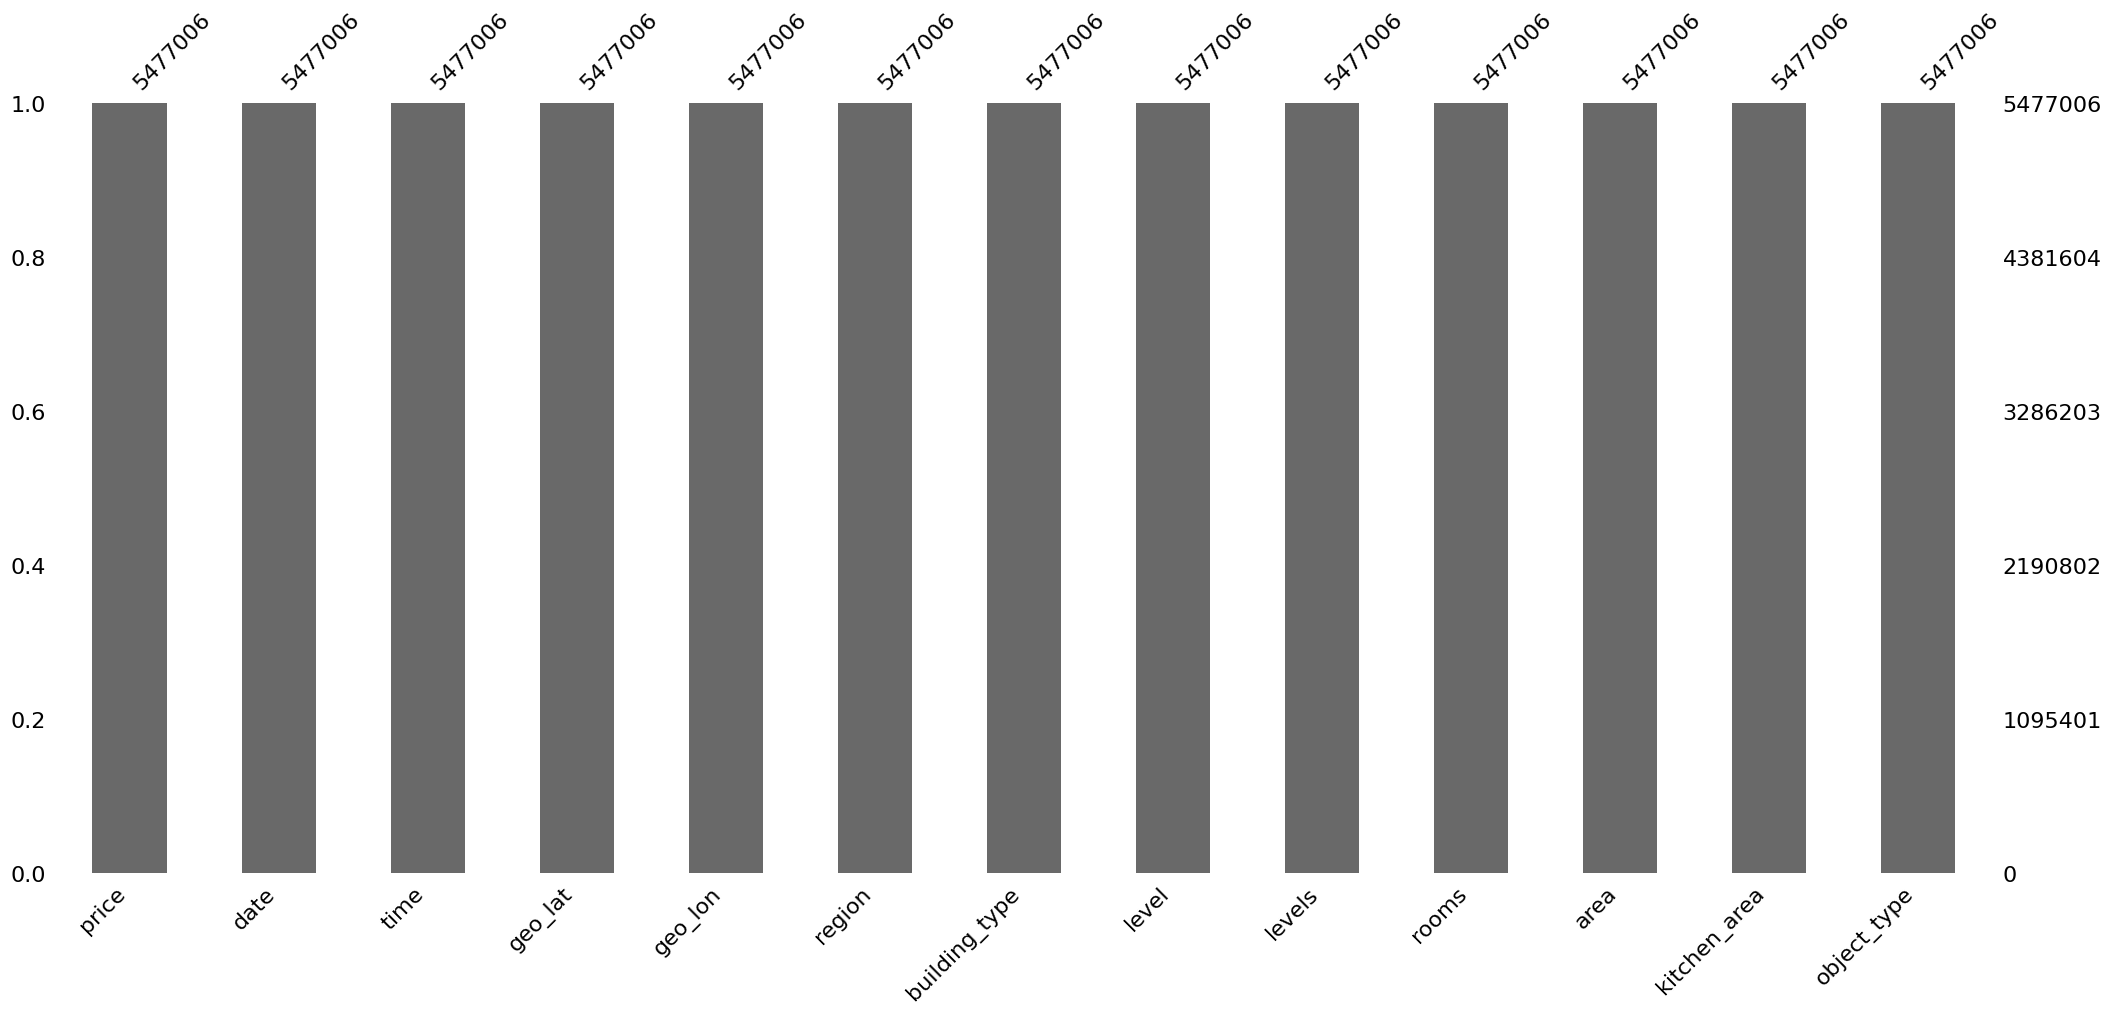

In [11]:
msno.bar(df)
plt.show()

<Figure size 1500x1500 with 0 Axes>

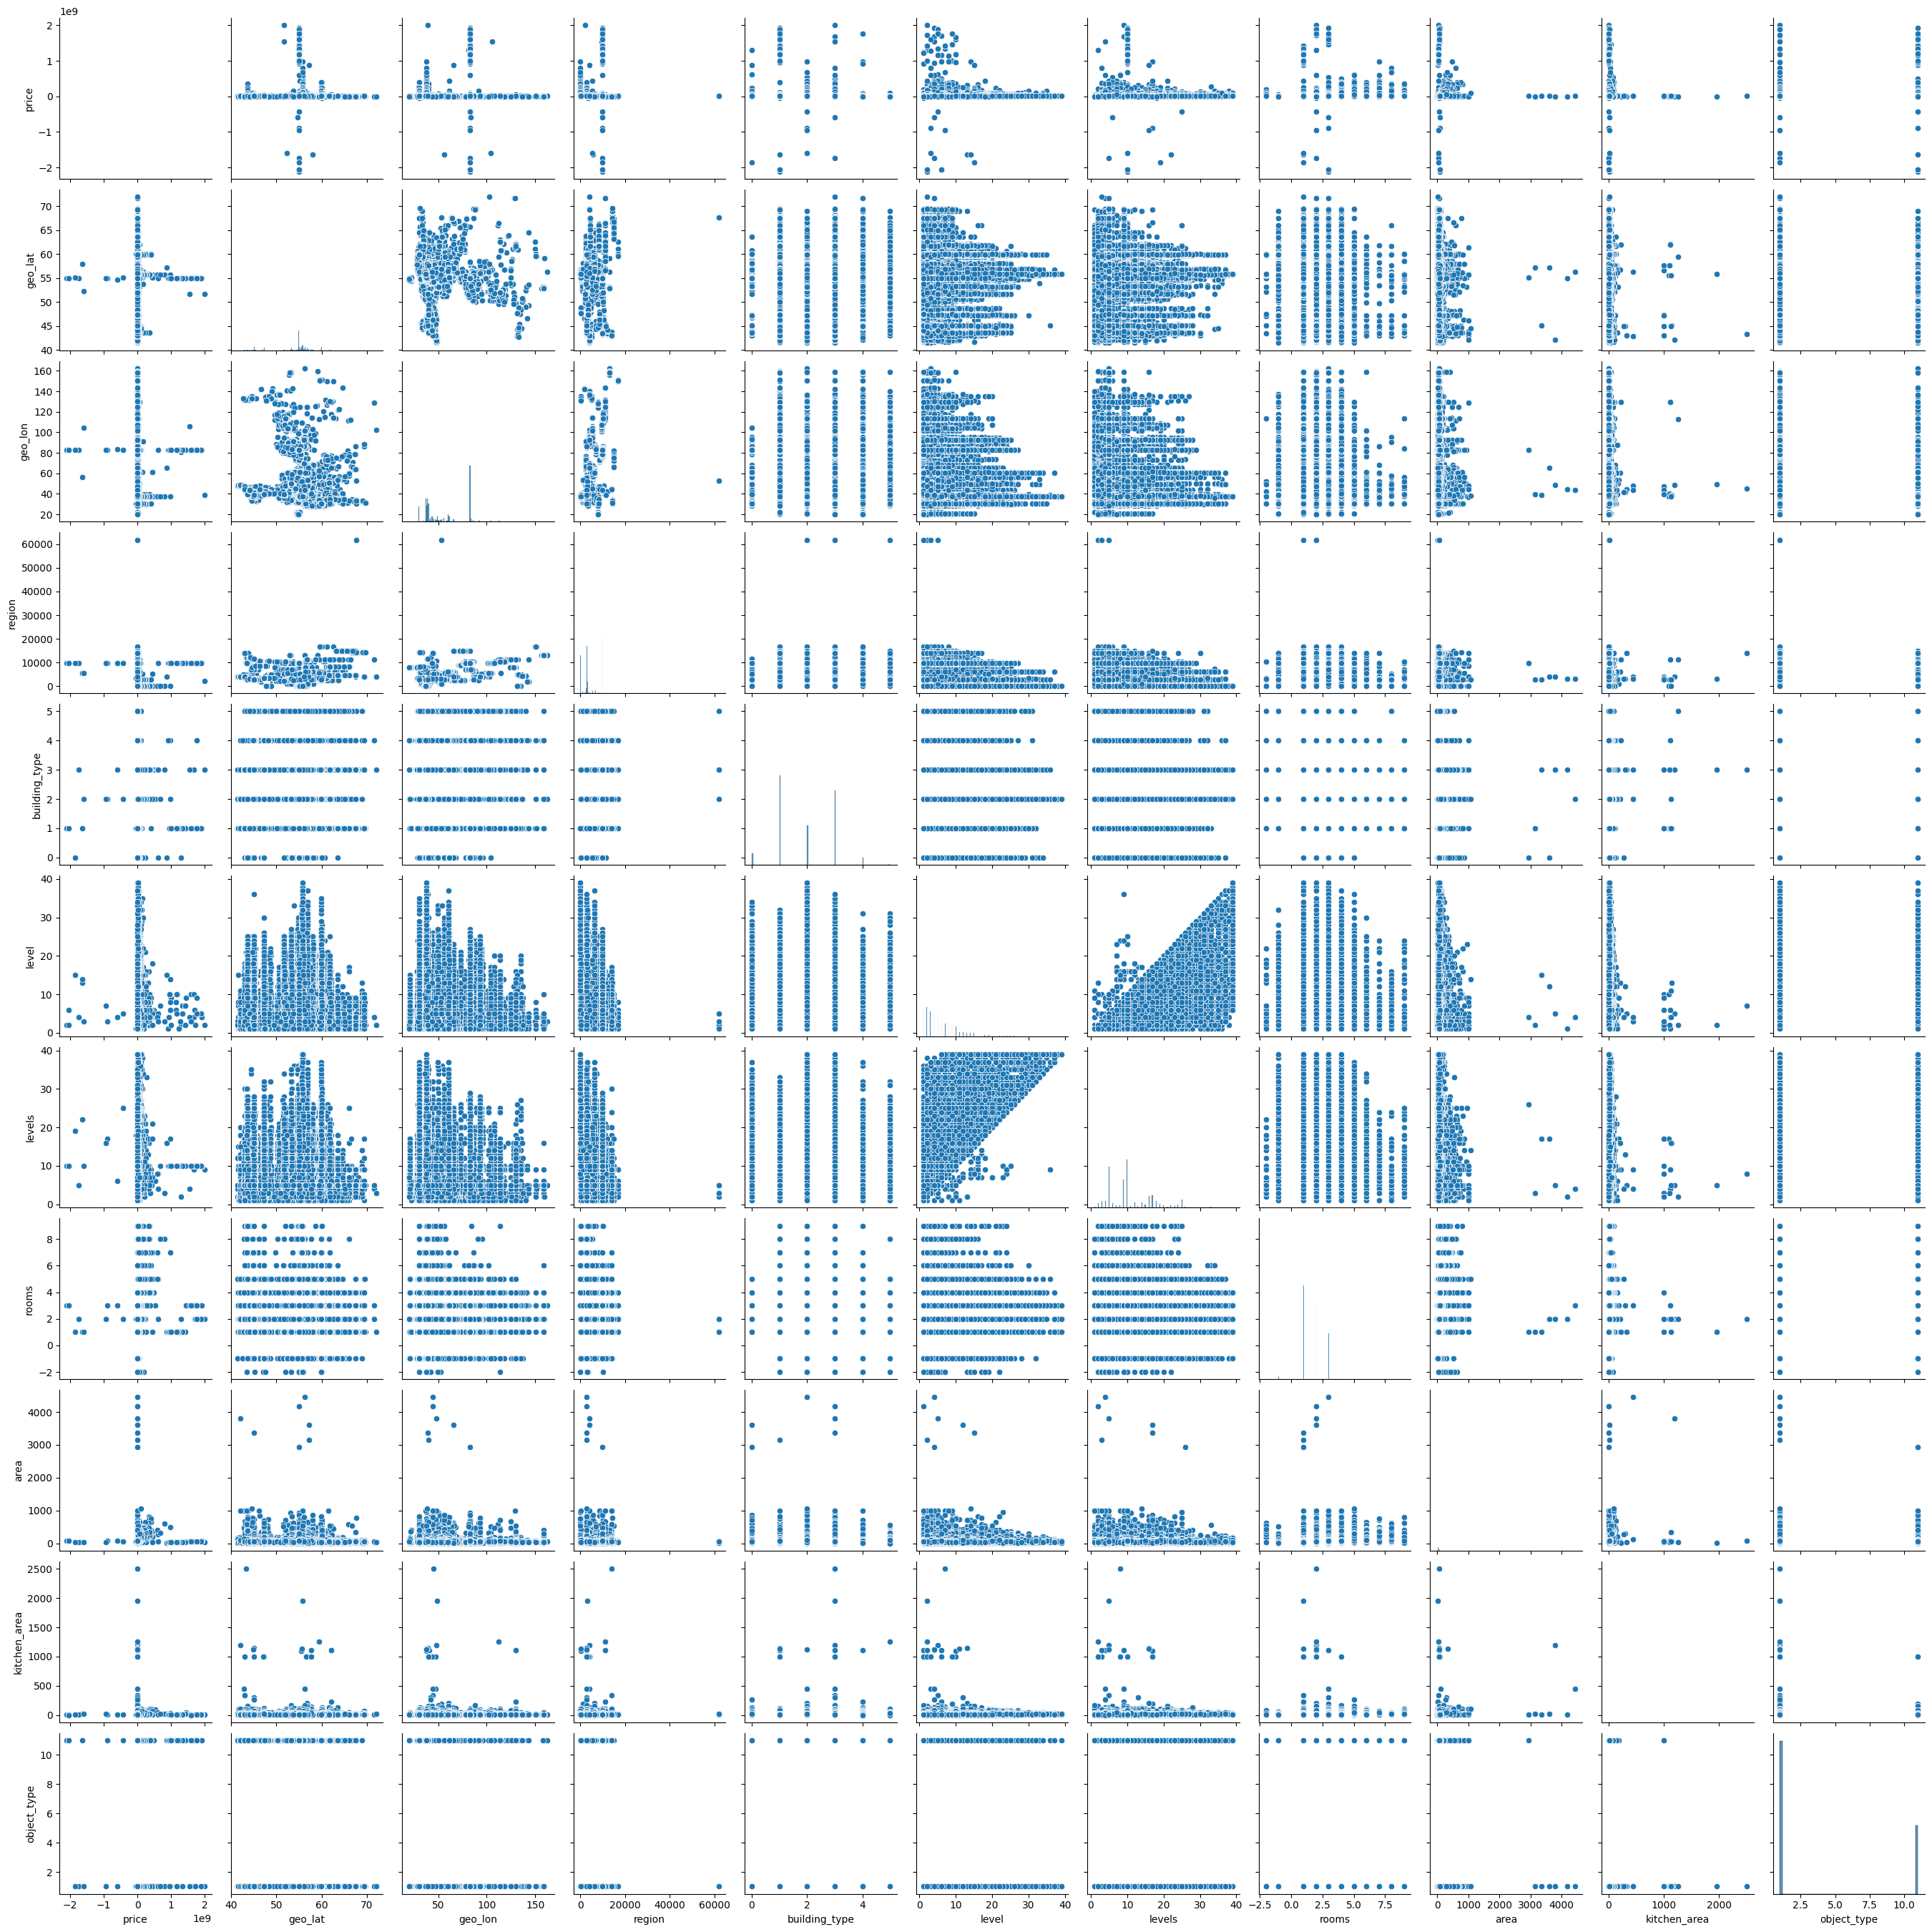

In [7]:
def show_pair_plot(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    sb.pairplot(df.select_dtypes(exclude = ['object']))
    plt.show()

show_pair_plot(df[:1_000_000])

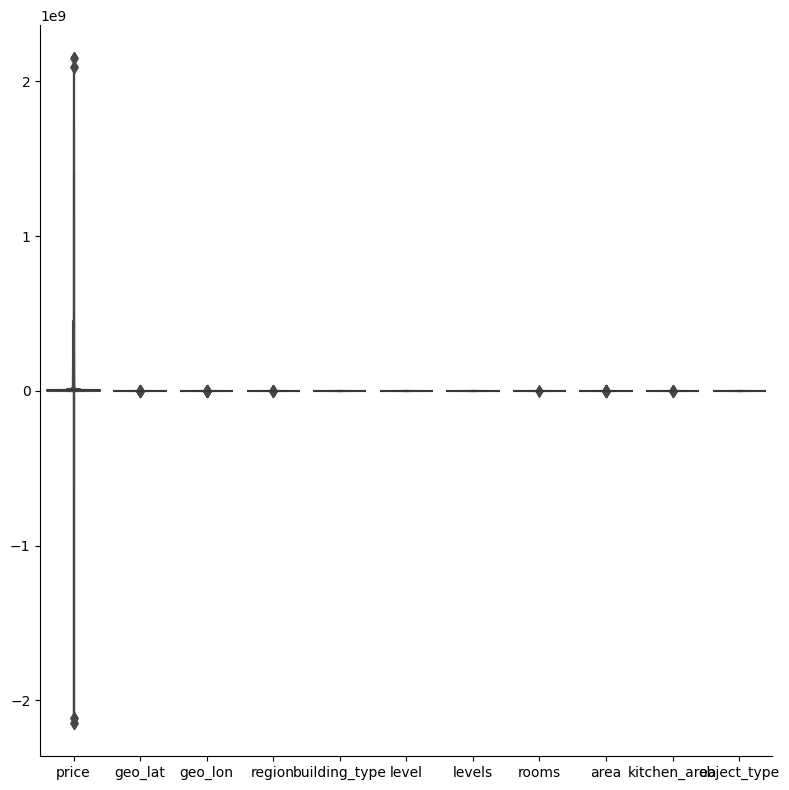

In [14]:
def show_cat_plot(df):
    sb.catplot(df, kind = 'boxen', height = 8)
    plt.show()

show_cat_plot(df)

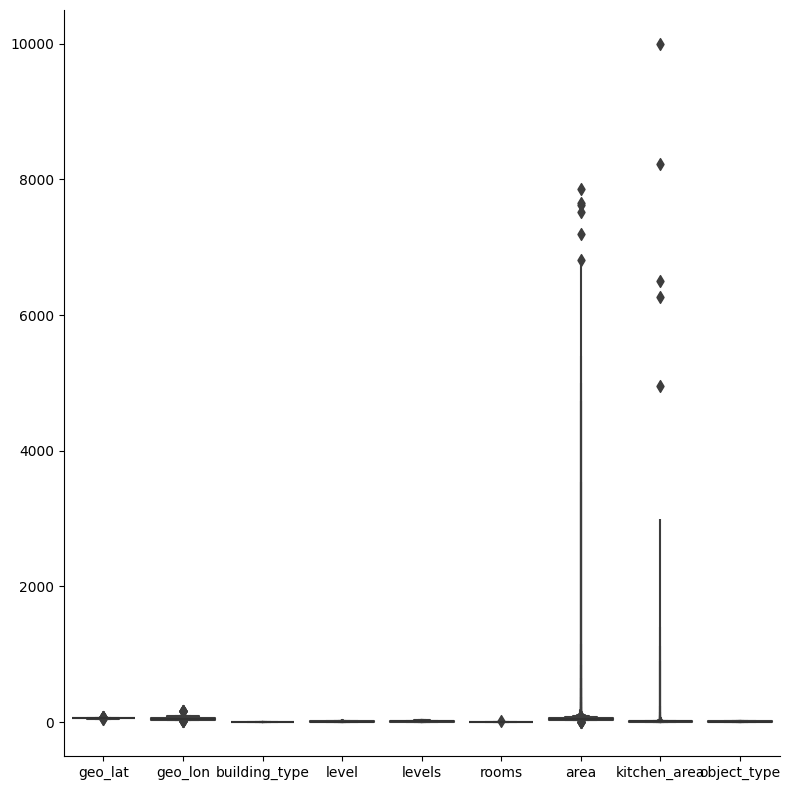

In [16]:
show_cat_plot(df.drop(columns = ['price', 'region']))

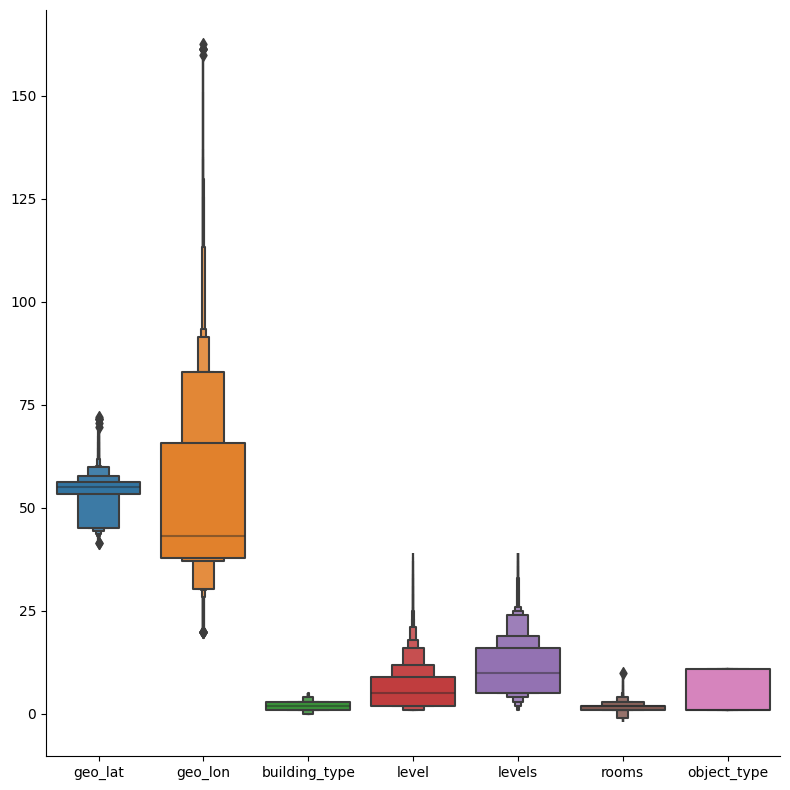

In [17]:
show_cat_plot(df.drop(columns = ['price', 'region', 'area', 'kitchen_area']))

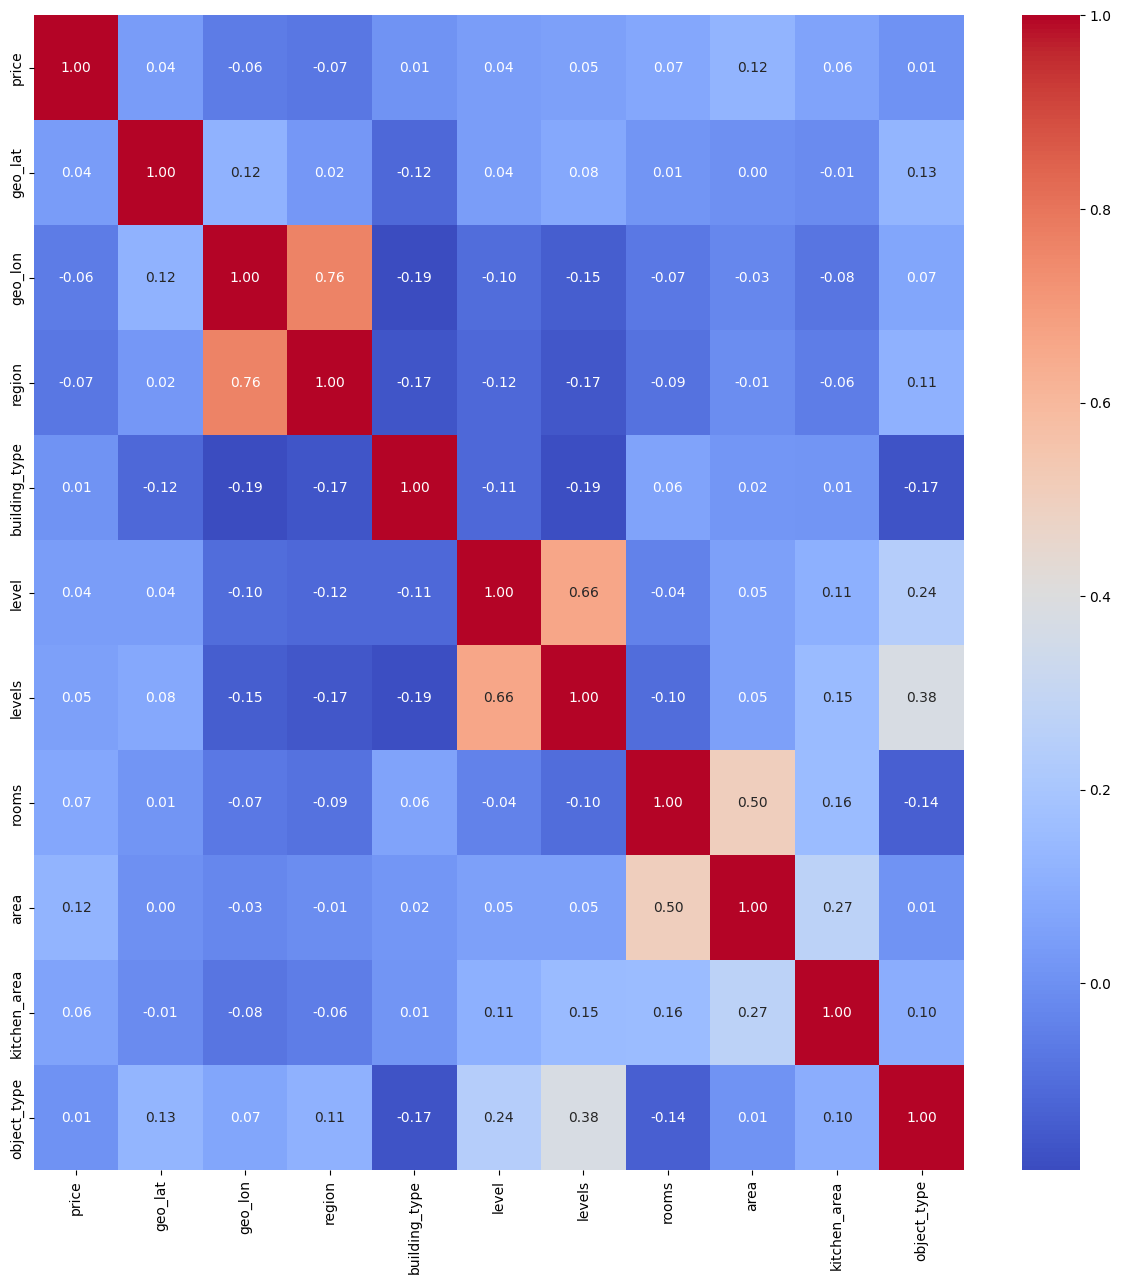

In [18]:
def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    sb.heatmap(
        df.select_dtypes(exclude = ['object']).corr(),
        annot = True,
        cmap = 'coolwarm',
        fmt = '.2f')
    plt.show()

show_correlation_map(df)

<ipython-input-19-e189f1a55341>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

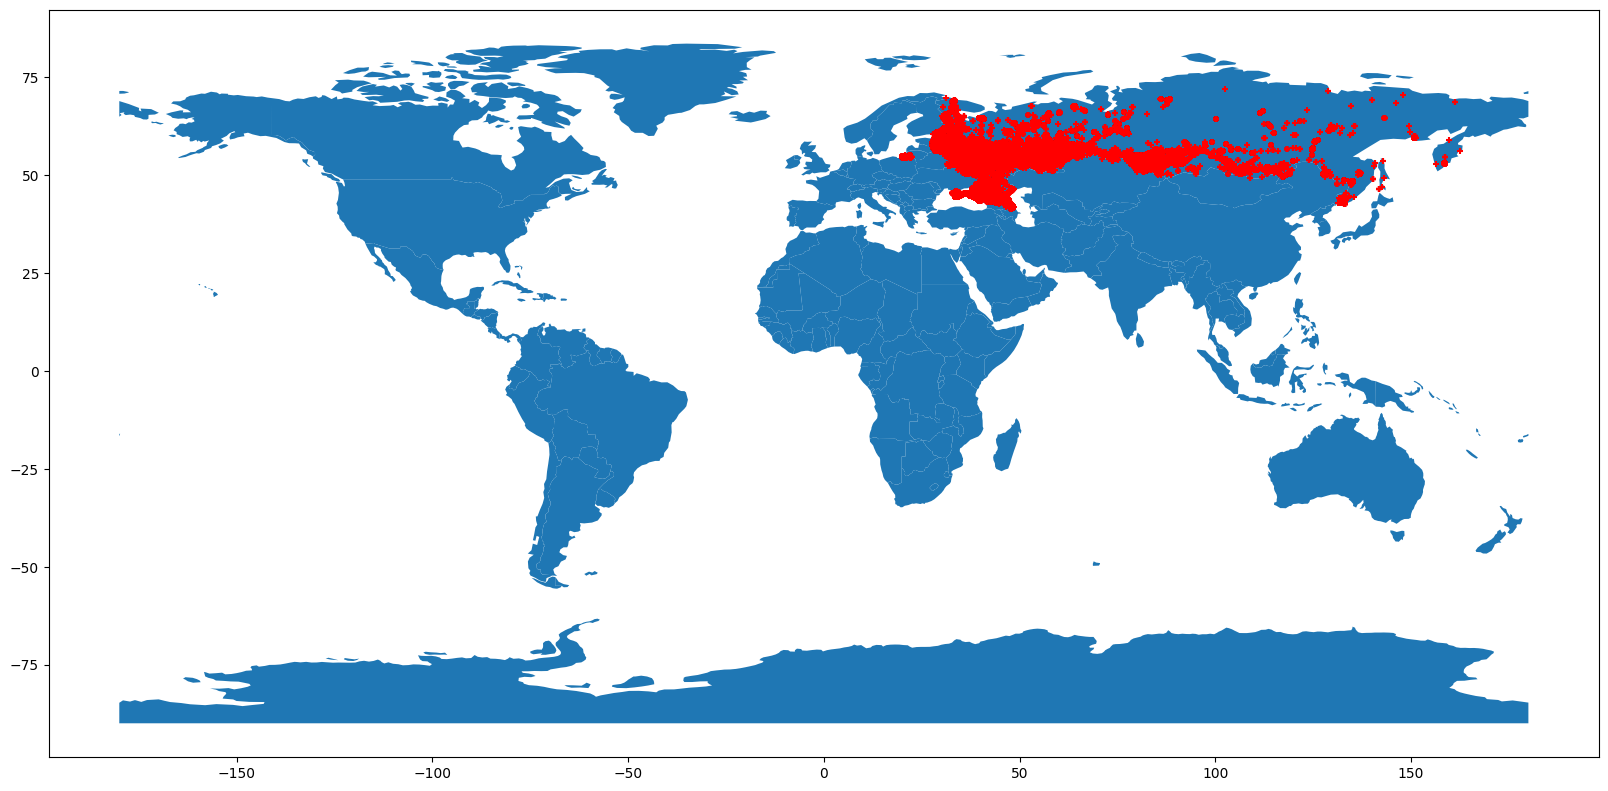

In [19]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['geo_lon'], df['geo_lat'])]
gdf = GeoDataFrame(df, geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(
    ax = world.plot(figsize = (20, 10)),
    marker = '+',
    color = 'red',
    markersize = 15)

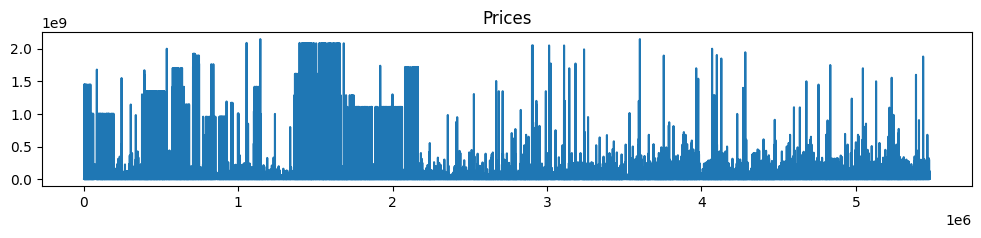

In [9]:
plt.figure(figsize = (12, 2))
plt.title('Prices')
df[df.price > 0].price.plot()
plt.show()

# Preprocessing

In [6]:
df.columns

Index(['price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

## Drop unnecessary columns

In [7]:
df_prep = df.copy()
df_prep.drop(columns = ['date', 'time', 'geo_lat', 'geo_lon', 'region'], inplace = True)
df_prep

,price,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,1,8,10,3,82.6,10.8,1
1,8650000,3,5,24,2,69.1,12.0,1
2,4000000,1,5,9,3,66.0,10.0,1
3,1850000,4,12,16,2,38.0,5.0,11
4,5450000,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...
5477001,19739760,1,8,17,4,93.2,13.8,11
5477002,12503160,2,17,32,2,45.9,6.6,11
5477003,8800000,2,4,17,3,86.5,11.8,1
5477004,11831910,1,8,33,2,52.1,18.9,11


## Remove outliers and strange values

In [8]:
def remove_outliers(df, column, low_quantile, high_quantile):
    q_low = df[column].quantile(low_quantile)
    q_high = df[column].quantile(high_quantile)
    return df[(df[column] < q_high) & (df[column] > q_low)]

df_prep = df_prep[df_prep.price > 0]
df_prep = df_prep[df_prep.rooms > -2]
df_prep = remove_outliers(df_prep, 'price', 0.05, 0.95)
df_prep = remove_outliers(df_prep, 'kitchen_area', 0.05, 0.95)
df_prep = remove_outliers(df_prep, 'area', 0.05, 0.95)
df_prep

,price,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,1,8,10,3,82.6,10.8,1
1,8650000,3,5,24,2,69.1,12.0,1
2,4000000,1,5,9,3,66.0,10.0,1
4,5450000,3,13,14,2,60.0,10.0,1
5,3300000,1,4,5,1,32.0,6.0,1
...,...,...,...,...,...,...,...,...
5476990,5800000,2,1,16,2,61.0,12.0,11
5476991,2600000,4,1,2,3,63.0,8.0,1
5476992,1700000,3,1,3,2,48.0,9.0,1
5476996,6400000,3,4,17,3,82.0,10.6,1


## Encode the categorical columns

In [9]:
df_prep.object_type.replace({11: 2}, inplace = True)
df_prep

,price,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,1,8,10,3,82.6,10.8,1
1,8650000,3,5,24,2,69.1,12.0,1
2,4000000,1,5,9,3,66.0,10.0,1
4,5450000,3,13,14,2,60.0,10.0,1
5,3300000,1,4,5,1,32.0,6.0,1
...,...,...,...,...,...,...,...,...
5476990,5800000,2,1,16,2,61.0,12.0,2
5476991,2600000,4,1,2,3,63.0,8.0,1
5476992,1700000,3,1,3,2,48.0,9.0,1
5476996,6400000,3,4,17,3,82.0,10.6,1


In [10]:
df_prep = pd.get_dummies(df_prep, columns = ['object_type', 'building_type'])
df_prep

,price,level,levels,rooms,area,kitchen_area,object_type_1,object_type_2,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5
0,6050000,8,10,3,82.6,10.8,1,0,0,1,0,0,0,0
1,8650000,5,24,2,69.1,12.0,1,0,0,0,0,1,0,0
2,4000000,5,9,3,66.0,10.0,1,0,0,1,0,0,0,0
4,5450000,13,14,2,60.0,10.0,1,0,0,0,0,1,0,0
5,3300000,4,5,1,32.0,6.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476990,5800000,1,16,2,61.0,12.0,0,1,0,0,1,0,0,0
5476991,2600000,1,2,3,63.0,8.0,1,0,0,0,0,0,1,0
5476992,1700000,1,3,2,48.0,9.0,1,0,0,0,0,1,0,0
5476996,6400000,4,17,3,82.0,10.6,1,0,0,0,0,1,0,0


## Reset index

In [11]:
df_prep = df_prep.reset_index().drop(columns = ['index'])
df_prep

,price,level,levels,rooms,area,kitchen_area,object_type_1,object_type_2,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5
0,6050000,8,10,3,82.6,10.8,1,0,0,1,0,0,0,0
1,8650000,5,24,2,69.1,12.0,1,0,0,0,0,1,0,0
2,4000000,5,9,3,66.0,10.0,1,0,0,1,0,0,0,0
3,5450000,13,14,2,60.0,10.0,1,0,0,0,0,1,0,0
4,3300000,4,5,1,32.0,6.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833547,5800000,1,16,2,61.0,12.0,0,1,0,0,1,0,0,0
3833548,2600000,1,2,3,63.0,8.0,1,0,0,0,0,0,1,0
3833549,1700000,1,3,2,48.0,9.0,1,0,0,0,0,1,0,0
3833550,6400000,4,17,3,82.0,10.6,1,0,0,0,0,1,0,0


## Standardization

In [12]:
df_nums = df_prep[['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area']]
df_nums

,price,level,levels,rooms,area,kitchen_area
0,6050000,8,10,3,82.6,10.8
1,8650000,5,24,2,69.1,12.0
2,4000000,5,9,3,66.0,10.0
3,5450000,13,14,2,60.0,10.0
4,3300000,4,5,1,32.0,6.0
...,...,...,...,...,...,...
3833547,5800000,1,16,2,61.0,12.0
3833548,2600000,1,2,3,63.0,8.0
3833549,1700000,1,3,2,48.0,9.0
3833550,6400000,4,17,3,82.0,10.6


In [13]:
scaler = StandardScaler()
df_std = pd.DataFrame(
    scaler.fit_transform(df_nums),
    columns = list(df_nums.columns))
df_std

,price,level,levels,rooms,area,kitchen_area
0,1.238556,0.365924,-0.222288,1.436410,2.367928,0.221489
1,2.536315,-0.255453,1.998550,0.261944,1.349264,0.616257
2,0.215322,-0.255453,-0.380920,1.436410,1.115349,-0.041689
3,0.939073,1.401554,0.412237,0.261944,0.662609,-0.041689
4,-0.134074,-0.462579,-1.015445,-0.912523,-1.450175,-1.357580
...,...,...,...,...,...,...
3833547,1.113771,-1.083957,0.729500,0.261944,0.738066,0.616257
3833548,-0.483471,-1.083957,-1.491339,1.436410,0.888979,-0.699634
3833549,-0.932695,-1.083957,-1.332708,0.261944,-0.242869,-0.370661
3833550,1.413254,-0.462579,0.888131,1.436410,2.322654,0.155695


In [14]:
df_prep.price = df_std.price
df_prep.level = df_std.level
df_prep.levels = df_std.levels
df_prep.rooms = df_std.rooms
df_prep.area = df_std.area
df_prep.kitchen_area = df_std.kitchen_area
df_prep

,price,level,levels,rooms,area,kitchen_area,object_type_1,object_type_2,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5
0,1.238556,0.365924,-0.222288,1.436410,2.367928,0.221489,1,0,0,1,0,0,0,0
1,2.536315,-0.255453,1.998550,0.261944,1.349264,0.616257,1,0,0,0,0,1,0,0
2,0.215322,-0.255453,-0.380920,1.436410,1.115349,-0.041689,1,0,0,1,0,0,0,0
3,0.939073,1.401554,0.412237,0.261944,0.662609,-0.041689,1,0,0,0,0,1,0,0
4,-0.134074,-0.462579,-1.015445,-0.912523,-1.450175,-1.357580,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833547,1.113771,-1.083957,0.729500,0.261944,0.738066,0.616257,0,1,0,0,1,0,0,0
3833548,-0.483471,-1.083957,-1.491339,1.436410,0.888979,-0.699634,1,0,0,0,0,0,1,0
3833549,-0.932695,-1.083957,-1.332708,0.261944,-0.242869,-0.370661,1,0,0,0,0,1,0,0
3833550,1.413254,-0.462579,0.888131,1.436410,2.322654,0.155695,1,0,0,0,0,1,0,0


## (Optional) Save to disk

In [15]:
df_prep.to_csv(f'{drive_path}/Russia_Real_Estate_Prep_2.csv', index = False)

# Preparation for CV

In [11]:
df_prep = pd.read_csv(f'{drive_path}/Russia_Real_Estate_Prep_2.csv')
df_prep = df_prep[:100_000] # taking a smaller subset
x = df_prep.drop(columns = ['price'])
y = df_prep.price

del df_prep

# Cross-validation for ML regression methods

----- LR
R2: mean - 0.32217070213782095; std - 0.001703188471333216
MSE: mean - -0.6249510636114965; std - 0.004911159059620069
RMSE: mean - -0.7905323580433844; std - 0.0031071687857133637
MAE: mean - -0.5704992455573592; std - 0.0013056309942897494
----- CART
R2: mean - 0.2975794392702122; std - 0.006660618248881282
MSE: mean - -0.6476433296534935; std - 0.009255028621328872
RMSE: mean - -0.8047422544900026; std - 0.005764849680721794
MAE: mean - -0.46420711493914535; std - 0.0032798014620786828
----- RF
R2: mean - 0.5776464972210902; std - 0.0020939350824913127
MSE: mean - -0.3894104312146826; std - 0.004022249146229331
RMSE: mean - -0.624019259754971; std - 0.003224076540744558
MAE: mean - -0.3845500157990336; std - 0.0013809839564685373
----- XT
R2: mean - 0.5589245587510331; std - 0.0010248858042048556
MSE: mean - -0.40666637213613216; std - 0.003136529476515036
RMSE: mean - -0.6376992388066688; std - 0.0024602767176480395
MAE: mean - -0.38267432107920013; std - 0.001049587212285

Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Default metric period is 5 because R2 is/are not implem

----- CAT
R2: mean - 0.5682659538936813; std - 0.0022349796321809107
MSE: mean - -0.39805986682091477; std - 0.004207172833528194
RMSE: mean - -0.6309110385311469; std - 0.0033358518094997324
MAE: mean - -0.42622903875230295; std - 0.0016820155203596731


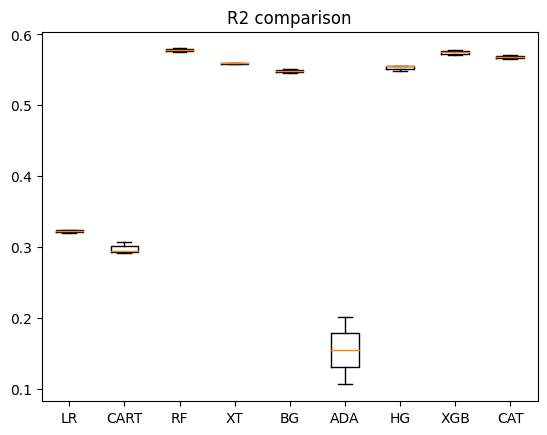

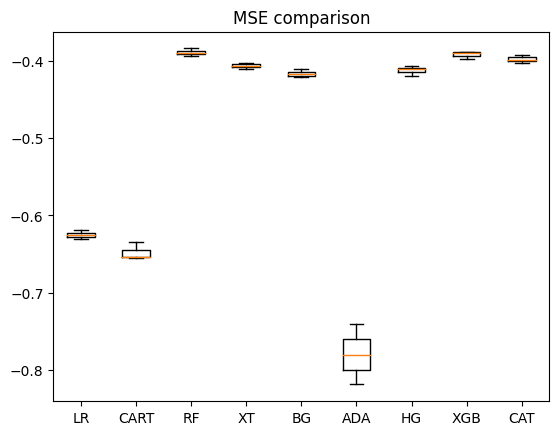

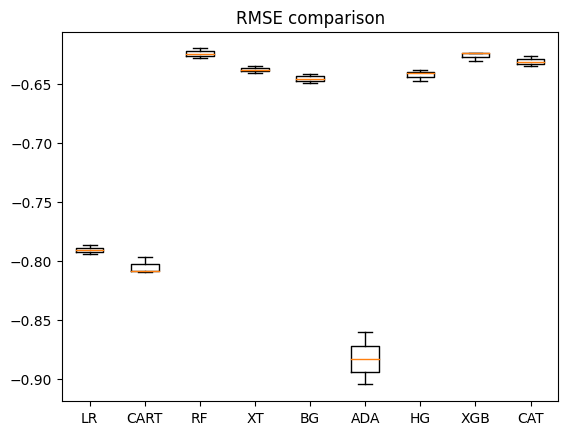

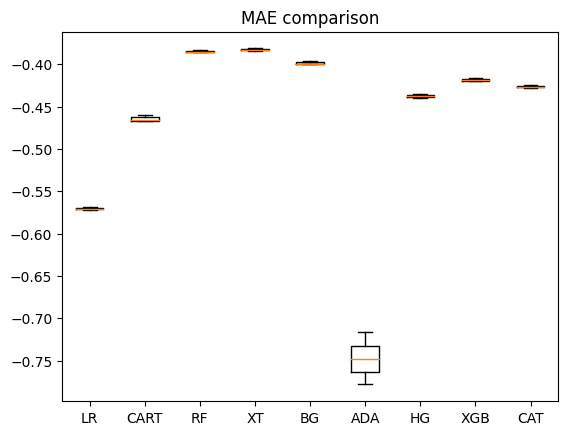

In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = []
models.append(('LR', LinearRegression(n_jobs = -1)))
models.append(('CART', DecisionTreeRegressor(random_state = 42)))
models.append(('RF', RandomForestRegressor(n_jobs = -1, random_state = 42)))
models.append(('XT', ExtraTreesRegressor(n_jobs = -1, random_state = 42)))
models.append(('BG', BaggingRegressor(n_jobs = -1, random_state = 42)))
models.append(('ADA', AdaBoostRegressor(random_state = 42)))
models.append(('HG', HistGradientBoostingRegressor(random_state = 42)))
models.append(('XGB', XGBRegressor(tree_method = 'gpu_hist', verbosity = 0, random_state = 42)))
models.append(('CAT', CatBoostRegressor(
    random_seed = 42,
    loss_function = 'RMSE',
    eval_metric = 'R2',
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    logging_level = 'Silent')))

num_folds = 3
r2_results = []
mse_results = []
rmse_results = []
mae_results = []
names = []
for name, model in models:
    names.append(name)
    kfold = KFold(n_splits = num_folds, random_state = 42, shuffle = True)
    r2_cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'r2')
    r2_results.append(r2_cv_results)
    mse_cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_mean_squared_error')
    mse_results.append(mse_cv_results)
    rmse_cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_root_mean_squared_error')
    rmse_results.append(rmse_cv_results)
    mae_cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_mean_absolute_error')
    mae_results.append(mae_cv_results)
    print(f'----- {name}')
    print(f'R2: mean - {r2_cv_results.mean()}; std - {r2_cv_results.std()}')
    print(f'MSE: mean - {mse_cv_results.mean()}; std - {mse_cv_results.std()}')
    print(f'RMSE: mean - {rmse_cv_results.mean()}; std - {rmse_cv_results.std()}')
    print(f'MAE: mean - {mae_cv_results.mean()}; std - {mae_cv_results.std()}')

plt.boxplot(r2_results, labels = names)
plt.title('R2 comparison')
plt.show()
plt.boxplot(mse_results, labels = names)
plt.title('MSE comparison')
plt.show()
plt.boxplot(rmse_results, labels = names)
plt.title('RMSE comparison')
plt.show()
plt.boxplot(mae_results, labels = names)
plt.title('MAE comparison')
plt.show()

# Cross-validation for MLP-regressor

In [14]:
def show_regression_chart(y, prediction, sort = True):
    t = pd.DataFrame({'prediction': prediction, 'y': y})
    if sort:
        t.sort_values(by = ['y'], inplace = True)
    plt.figure(figsize = (10, 6))
    plt.plot(t['prediction'].tolist(), label = 'prediction')
    plt.plot(t['y'].tolist(), label = 'expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

def show_training_history(history, metrics, metric_names, figure_size = (7, 6), last_epoch = None):
    if len(metrics) == 1 and len(metric_names) == 1:
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots()
        metric = metrics[0]
        metric_name = metric_names[0]
        ax.plot(history[metric], color = 'b', label = f'Training {metric_name}')
        if f'val_{metric}' in history:
            ax.plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}')
        if last_epoch is not None:
            ax.axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
        legend = ax.legend(loc = 'best', shadow = True)
        plt.show()
    elif len(metrics) > 1 and len(metrics) == len(metric_names):
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots(len(metrics), 1)
        for i in range(len(metrics)):
            metric = metrics[i]
            metric_name = metric_names[i]
            ax[i].plot(history[metric], color = 'b', label = f'Training {metric_name}')
            if f'val_{metric}' in history:
                ax[i].plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}', axes = ax[i])
            if last_epoch is not None:
                ax[i].axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
            legend = ax[i].legend(loc = 'best', shadow = True)
        plt.show()
    else:
        raise Exception('Invalid metrics/metric names amount')

---
Training for fold 1...
Epoch 1/5
2500/2500 [==============================] - 12s 4ms/step - loss: 0.5893 - mean_absolute_error: 0.5530
Epoch 2/5
2500/2500 [==============================] - 9s 3ms/step - loss: 0.5302 - mean_absolute_error: 0.5182
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5180 - mean_absolute_error: 0.5096
Epoch 4/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5115 - mean_absolute_error: 0.5059
Epoch 5/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5049 - mean_absolute_error: 0.5024
Score for fold 1: loss of 0.4871574342250824; mean_absolute_error of 0.48812222480773926


<Figure size 700x600 with 0 Axes>

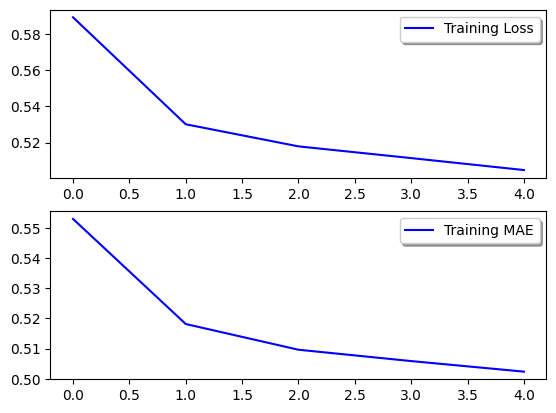

R2 score: 0.4755103864375475
MSE error: 0.4871576502455855
RMSE error: 0.6979667973804954


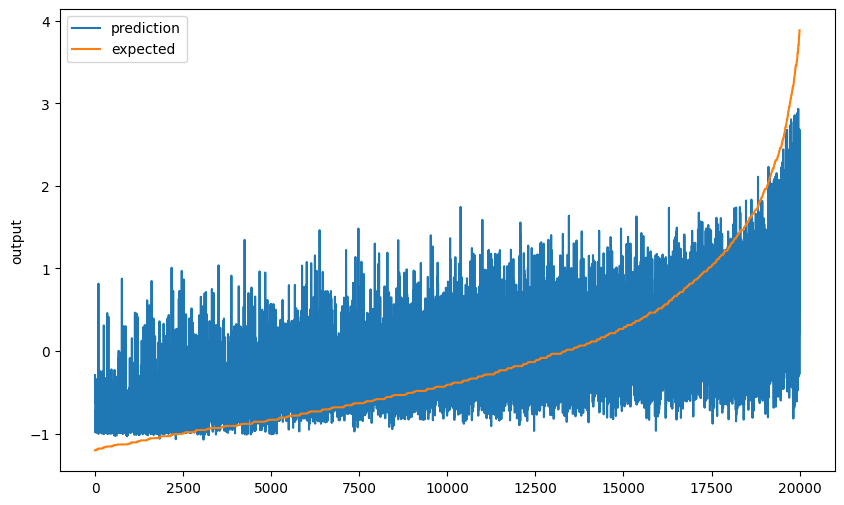

---
Training for fold 2...
Epoch 1/5
2500/2500 [==============================] - 12s 4ms/step - loss: 0.5948 - mean_absolute_error: 0.5567
Epoch 2/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5390 - mean_absolute_error: 0.5232
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5210 - mean_absolute_error: 0.5117
Epoch 4/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5120 - mean_absolute_error: 0.5055
Epoch 5/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5056 - mean_absolute_error: 0.5025
Score for fold 2: loss of 0.4731166362762451; mean_absolute_error of 0.4791777729988098


<Figure size 700x600 with 0 Axes>

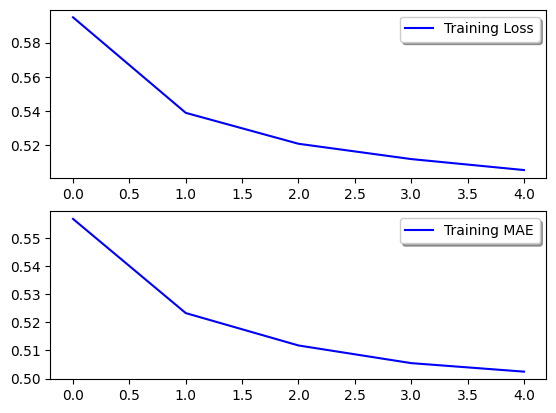

R2 score: 0.4819886341086064
MSE error: 0.4731168476335875
RMSE error: 0.6878348985284096


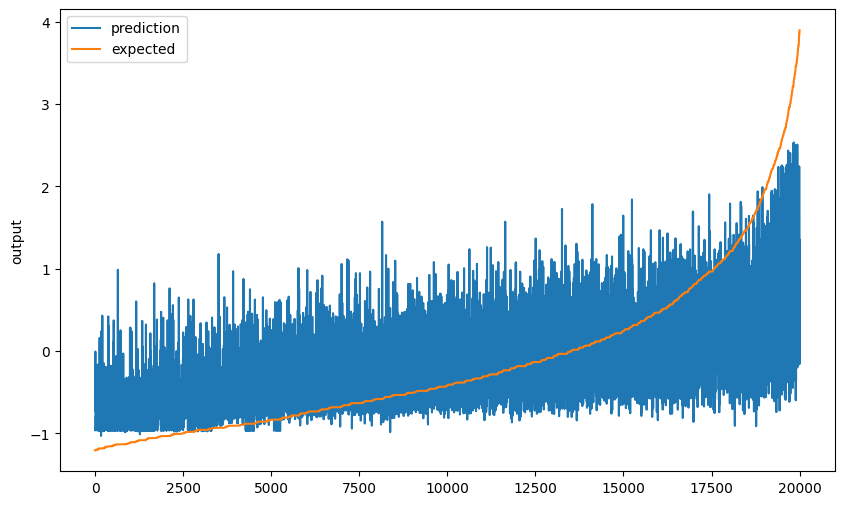

---
Training for fold 3...
Epoch 1/5
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5923 - mean_absolute_error: 0.5541
Epoch 2/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5320 - mean_absolute_error: 0.5189
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5175 - mean_absolute_error: 0.5097
Epoch 4/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5080 - mean_absolute_error: 0.5028
Epoch 5/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5035 - mean_absolute_error: 0.5010
Score for fold 3: loss of 0.4797426760196686; mean_absolute_error of 0.49314218759536743


<Figure size 700x600 with 0 Axes>

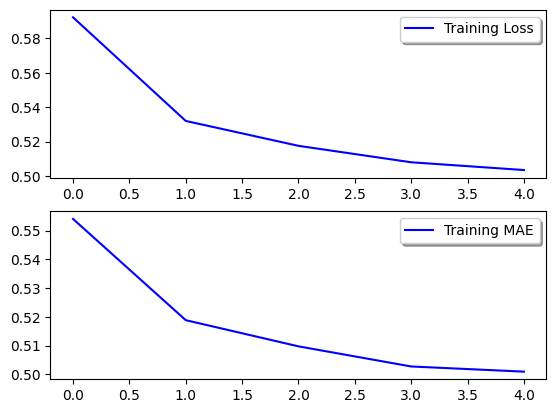

R2 score: 0.48403964555613
MSE error: 0.47974248312901935
RMSE error: 0.692634451300987


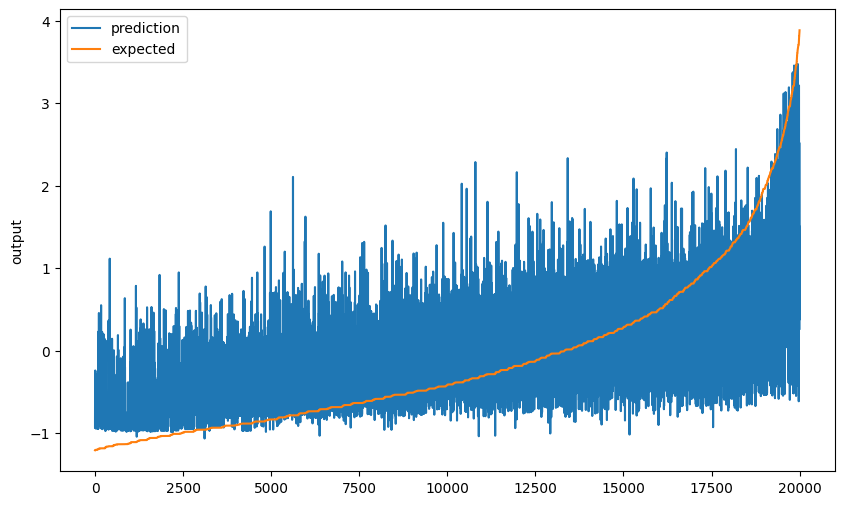

---
Training for fold 4...
Epoch 1/5
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5981 - mean_absolute_error: 0.5573
Epoch 2/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5399 - mean_absolute_error: 0.5228
Epoch 3/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5231 - mean_absolute_error: 0.5131
Epoch 4/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5139 - mean_absolute_error: 0.5072
Epoch 5/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5087 - mean_absolute_error: 0.5034
Score for fold 4: loss of 0.47072821855545044; mean_absolute_error of 0.48650527000427246


<Figure size 700x600 with 0 Axes>

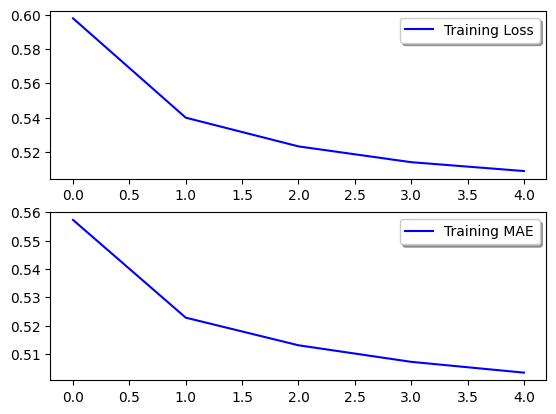

R2 score: 0.4856664106116032
MSE error: 0.4707282204415309
RMSE error: 0.6860963638159955


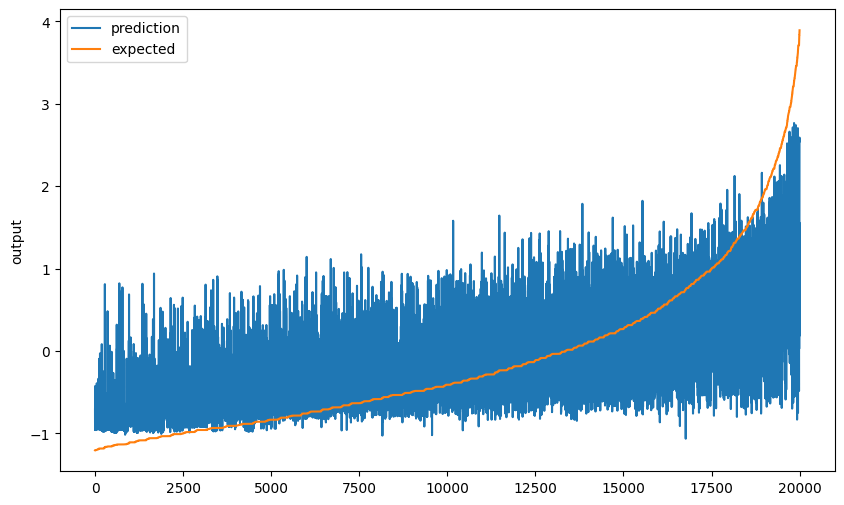

---
Training for fold 5...
Epoch 1/5
2500/2500 [==============================] - 12s 4ms/step - loss: 0.5891 - mean_absolute_error: 0.5526
Epoch 2/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5350 - mean_absolute_error: 0.5204
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5170 - mean_absolute_error: 0.5092
Epoch 4/5
2500/2500 [==============================] - 14s 6ms/step - loss: 0.5095 - mean_absolute_error: 0.5052
Epoch 5/5
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5033 - mean_absolute_error: 0.5011
Score for fold 5: loss of 0.4720669984817505; mean_absolute_error of 0.47216641902923584


<Figure size 700x600 with 0 Axes>

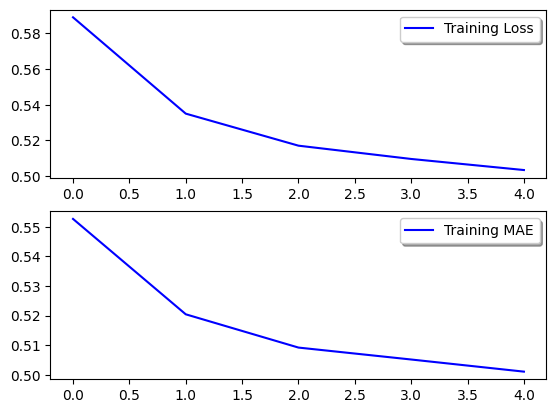

R2 score: 0.4883301381482019
MSE error: 0.4720670613705654
RMSE error: 0.6870713655586044


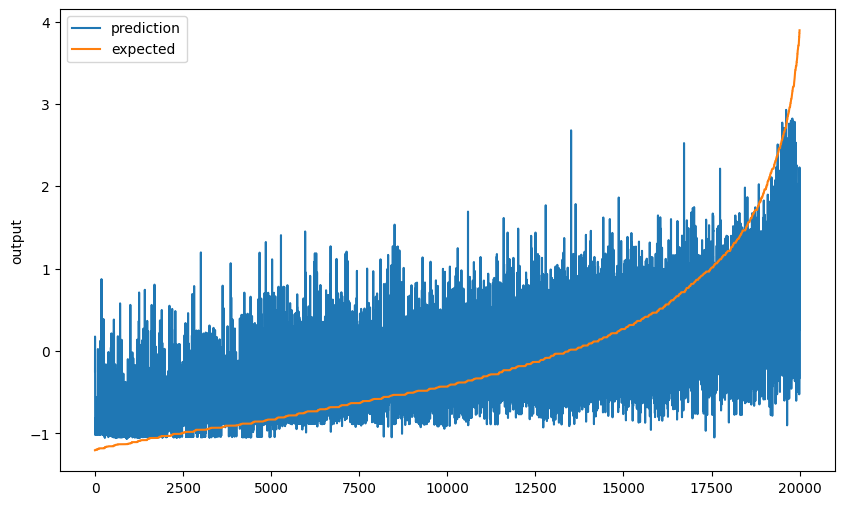

---
Score per fold
---
> Fold 1 - Loss: 0.4871574342250824 - MSE: 0.4871576502455855
---
> Fold 2 - Loss: 0.4731166362762451 - MSE: 0.4731168476335875
---
> Fold 3 - Loss: 0.4797426760196686 - MSE: 0.47974248312901935
---
> Fold 4 - Loss: 0.47072821855545044 - MSE: 0.4707282204415309
---
> Fold 5 - Loss: 0.4720669984817505 - MSE: 0.4720670613705654
---
Average scores for all folds:
> Loss: 0.4765623927116394
> MAE: 0.48382277488708497 (+- 0.007348185862213054)
> MSE: 0.4765624525640577 (+- 0.006139866579717741)
> RMSE: 0.6903207753168984 (+- 0.00443618416367411)
> R2: 0.48310704297241785 (+- 0.00432806798473395)
---


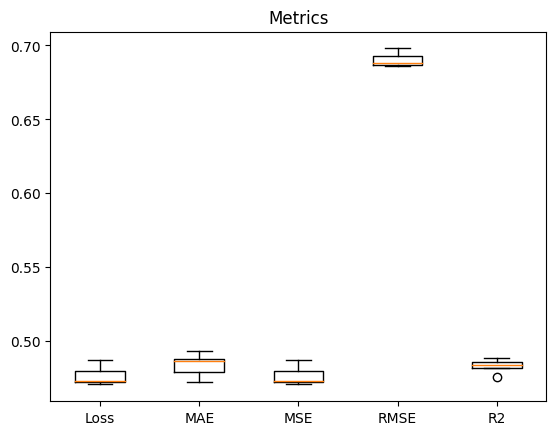

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

batch_size = 32
epochs = 5
num_folds = 5
mse_per_fold = []
rmse_per_fold = []
mae_per_fold = []
r2_per_fold = []
loss_per_fold = []
histories = []
kfold = KFold(n_splits = num_folds, random_state = 42, shuffle = True)
fold_no = 1
for train, test in kfold.split(x, y):
    model = Sequential(
    [
        Input(shape = x.shape[1]),
        Dense(50, activation = 'relu'),
        Dropout(0.15),
        Dense(50, activation = 'relu'),
        Dropout(0.20),
        Dense(50, activation = 'relu'),
        Dropout(0.25),
        Dense(50, activation = 'relu'),
        Dropout(0.30),
        Dense(1)
    ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
    print('---')
    print(f'Training for fold {fold_no}...')
    history = model.fit(
        x = x.iloc[train],
        y = y[train],
        batch_size = batch_size,
        epochs = epochs)
    histories.append(history.history)
    scores = model.evaluate(x.iloc[test], y[test], verbose = 0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    mae_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    show_training_history(history.history, ['loss', 'mean_absolute_error'], ['Loss', 'MAE'])
    y_pred = model.predict(x.iloc[test], verbose = 0)
    y_pred = y_pred.flatten()
    r2 = r2_score(y[test], y_pred)
    mse = mean_squared_error(y[test], y_pred)
    rmse = np.sqrt(mean_squared_error(y[test], y_pred))
    print(f'R2 score: {r2}')
    print(f'MSE error: {mse}')
    print(f'RMSE error: {rmse}')
    r2_per_fold.append(r2)
    mse_per_fold.append(mse)
    rmse_per_fold.append(rmse)
    show_regression_chart(y[test], y_pred)
    fold_no = fold_no + 1
print('---')
print('Score per fold')
for i in range(0, len(mse_per_fold)):
    print('---')
    print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]} - MSE: {mse_per_fold[i]}')
print('---')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> MAE: {np.mean(mae_per_fold)} (+- {np.std(mae_per_fold)})')
print(f'> MSE: {np.mean(mse_per_fold)} (+- {np.std(mse_per_fold)})')
print(f'> RMSE: {np.mean(rmse_per_fold)} (+- {np.std(rmse_per_fold)})')
print(f'> R2: {np.mean(r2_per_fold)} (+- {np.std(r2_per_fold)})')
print('---')
metrics = [
    loss_per_fold,
    mae_per_fold,
    mse_per_fold,
    rmse_per_fold,
    r2_per_fold]
plt.boxplot(metrics, labels = ['Loss', 'MAE', 'MSE', 'RMSE', 'R2'])
plt.title('Metrics')
plt.show()

# Test

In [17]:
df_prep = pd.read_csv(f'{drive_path}/Russia_Real_Estate_Prep_2.csv')
df_prep_train = df_prep[:100_000]
df_prep_test = df_prep[100_000:125_000]
x_train = df_prep_train.drop(columns = ['price'])
y_train = df_prep_train.price
x_test = df_prep_test.drop(columns = ['price'])
y_test = df_prep_test.price

del df_prep
del df_prep_train
del df_prep_test

Epoch 1/10
3125/3125 [==============================] - 16s 4ms/step - loss: 0.5823 - mean_absolute_error: 0.5484
Epoch 2/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5303 - mean_absolute_error: 0.5176
Epoch 3/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5173 - mean_absolute_error: 0.5097
Epoch 4/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5089 - mean_absolute_error: 0.5036
Epoch 5/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.5025 - mean_absolute_error: 0.4995
Epoch 6/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4991 - mean_absolute_error: 0.4978
Epoch 7/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4938 - mean_absolute_error: 0.4944
Epoch 8/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4936 - mean_absolute_error: 0.4934
Epoch 9/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4896 - me

<Figure size 700x600 with 0 Axes>

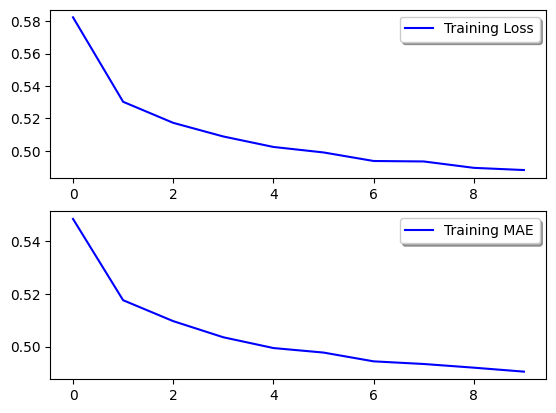

R2 score: 0.4429065751040494
MSE error: 0.45962894260045956
RMSE error: 0.6779593959821337


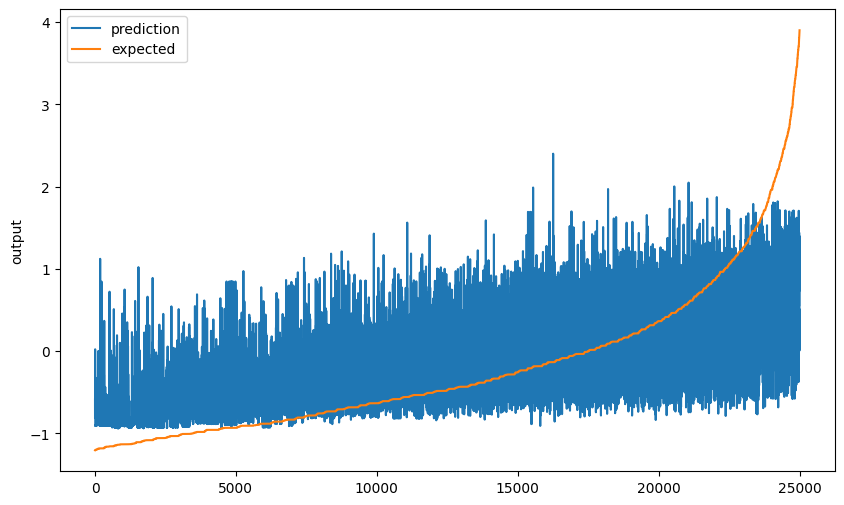

In [18]:
batch_size = 32
epochs = 10
model = Sequential(
[
    Input(shape = x_train.shape[1]),
    Dense(50, activation = 'relu'),
    Dropout(0.15),
    Dense(50, activation = 'relu'),
    Dropout(0.20),
    Dense(50, activation = 'relu'),
    Dropout(0.25),
    Dense(50, activation = 'relu'),
    Dropout(0.30),
    Dense(1)
])
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs)
scores = model.evaluate(x.iloc[test], y[test], verbose = 0)
print(f'Scores: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
show_training_history(history.history, ['loss', 'mean_absolute_error'], ['Loss', 'MAE'])
y_pred = model.predict(x_test, verbose = 0)
y_pred = y_pred.flatten()
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2 score: {r2}')
print(f'MSE error: {mse}')
print(f'RMSE error: {rmse}')
show_regression_chart(y_test, y_pred)